<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Movielens_using_Cassandrav1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Using the Cassandra NoSQL database, explore the **Movielens** dataset and build a movie recommendation engine

## Learning Objectives

At the end of the mini-project, you will be able to :

* understand the concepts of NoSQL platforms
* implement the database connectivity using Cassandra
* create and insert data to the database
* perform querying, retrieving and analyzing the data from database

### Dataset

The dataset chosen for this mini-project is [Movielens Dataset](https://movielens.org/). The dataset describes movies and ratings from Movielens. It contains movies from year 1919 to 2000 of total 3883 movies. There are 6040 users who have rated one or more than one movie of total 1000209 ratings collected. Movielens is maintained by members of GroupLens Research at the University of Minnesota. There are 3 datasets given, and they are:

1. `data_movie.csv` that contains movies information:

* MovieId
* Title
* Genres

2. `data_rating.csv` that contains ratings of movies by users:

* UserId
* MovieId
* Rating

3. `data_users.csv` that contains users information:

* UserId
* Age
* Gender

## Information

#### NoSQL platforms

A NoSQL database provides a mechanism for storage and retrieval of data that is modeled in a form other than the tabular relations used in relational databases.

**Cassandra**

Apache Cassandra is a free and open-source, distributed, wide-column store, NoSQL database management system designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. It is a NOSQL database developed by Facebook. It is a great database that allows you to effectively run queries on large amount of structured and semi structured data.

To know when you have to choose Cassandra as your database of choice, you need to have an understanding of CAP Theorem.

CAP theorem states that it is impossible for a distributed system to satisfy all three of these guarantees together, you need to leave one out.

- C is Consistency, means all nodes have the same data at the same time
- P is partition tolerance, means that in case of failure the system continues to operate
- A is availability , make sure every request receives a response

![img](https://developer.ibm.com/developer/default/tutorials/ba-set-up-apache-cassandra-architecture/images/figure1.png)

### Components of Cassandra

There are following components in the Cassandra

![img](https://www.guru99.com/images/cassandra/021116_0524_CassandraAr1.png)

**Node**
Node is the place where data is stored. It is the basic component of Cassandra.

**Data Center**
A collection of nodes are called data center. Many nodes are categorized as a data center.

**Cluster**
The cluster is the collection of many data centers.

**Commit Log**
Every write operation is written to Commit Log. Commit log is used for crash recovery.

**Mem-table**
After data written in Commit log, data is written in Mem-table. Data is written in Mem-table temporarily.

**SSTable**
When Mem-table reaches a certain threshold, data is flushed to an SSTable disk file.

### Data Replication

As hardware problem can occur or link can be down at any time during data process, a solution is required to provide a backup when the problem has occurred. So data is replicated for assuring no single point of failure.

Cassandra places replicas of data on different nodes based on these two factors.
- Where to place next replica is determined by the Replication Strategy.
- While the total number of replicas placed on different nodes is determined by the Replication Factor.

One Replication factor means that there is only a single copy of data while three replication factor means that there are three copies of the data on three different nodes.

**Install the cassandra-driver**

In [ ]:
!pip install cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 65.9 MB/s eta 0:00:00


#### Importing Necessary Packages

In [ ]:
import pandas as pd
import cassandra
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from matplotlib import pyplot as plt

In [ ]:
print(cassandra.__version__)

3.29.0


### Database connection

**Astra Datastax login:** Please refer to this [document](https://cdn.iisc.talentsprint.com/CDS/DB_Connect_Docs/Datastax_Connect.pdf) for account creation on DataStax

**Connect the database and create keyspace:**

* Download Secure Connect Bundle zip file from Datastax [connect](https://docs.datastax.com/en/astra/docs/obtaining-database-credentials.html) section. Follow the instructions on the page
* Upload the `Secure-connect-XXXX.zip` file, which is downloaded from datastax.
* Generate the token and save the credentials from settings section.
    - Hint: Select role as `admin-user` and generate token
* Using the credentials generated in settings, specify the `client Id` and `Client Secret` to the variables below.

In [ ]:
from google.colab import files
files.upload()

Saving secure-connect-db-manish-cds.zip to secure-connect-db-manish-cds.zip


{'secure-connect-db-manish-cds.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00Qw/X\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\t\x00ca.crtUT\x05\x00\x01\x1aH\xa5ed\x94\xcd\x92\xba8\x14\xc5\xf7<\xc5\xec\xad)\x01?\x90\xc5\x7fq\x03!\x80\x06\r\xf2\x15w\x82\x1a\xc4\x06\x15i\x02>\xfdT\xdb\x9b\xa9\x99,O\xa5~\xf7\x9c\xba\xb7\xce\xdf?\x0fa\xe2\x05\x7fY8\x8c<\xc7\xb3 \xc2\x1fU\xa1\x9egw\xb6e\xc1c\x14 =\x04\xc2\xb3P\x13K\x9bq\x7f}?xe_\x04\xc0\xf0\x061\x90\xe77\xdeP\xb8\x11\xd0b\x8cJj%\t\x1d\x14\xeb\r>\x12A\x82@Dp\x0b\x10\r\x99\xc4\x82\xdb\tc.\x96]\xc4\xd3\x85\xca\xf7\xc8\xce\x893\xf2\x08\x87\x14V\x1f\x80UR/$\x8e\xaa\xf0$Py&\x06\xbb\x02\xfa\x0bzE(\x0e^\xf9,\xb9\xd1=\x97>|`6\x1e\xb4\x8a\xef\x177~]\x94\xc5,\x1c\xf9^\x93Em\xde\x94M\x1d\x96\'\xe2\xbcO\xc4\x99o\xea\xa0\xcf#8;R\x1di\x04\x03\xad`\xa46\xd6\xa9\xed\x1f\x1d\xa9\xbe\xff\xabQ\xf7\xf5\xef\x08<\x82\xaf$\xa2\xec%-\xf6\x99\xeaa\xe9\xdb,\xc21E\xdeo\xee\x81nb\xdd\xf9>\x11,\x98>\x94E\x8d\x07\x05G\xb0\xfb\x05\xdc#\x0b\x7f\xdcD?n(\x9bK\xfb\xd7\

set the `Secure connect bundle zip file` path and specify the `clientID` and `Client_Secret`

In [ ]:
# Enter the credentials below
# zip_path = ''
# Client_ID = ''
# Client_Secret = ''
zip_path = '/content/secure-connect-db-manish-cds.zip'
Client_ID = 'KMnfWsZfbEfvYaKzHRdBZWDA'
Client_Secret = 'SRZPhd7UpTH_1ZTPginuR2mSfwk_3j0QfG4AoYA4EQ2b.xHrPTHlC,fAfpLdxNtynQbe9S,1OEUmW.6i3D4Z7aEirtidZb3pGf4B-7r,-616jZps8YktGDw1zyqQQUaB'

#### Create a Cluster instance to connect to your Astra database.

You will typically have one instance of Cluster for each Cassandra cluster you want to interact with. Create a session object using the cluster.

**Hint:** Refer Python documentation under Connect.

In [ ]:
cloud_config= {
        'secure_connect_bundle': zip_path
}
auth_provider = PlainTextAuthProvider(Client_ID,
                                      Client_Secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

ERROR:cassandra.connection:Closing connection <AsyncoreConnection(136451951498944) 5d017d89-db6c-418a-b8e6-2e36376269a9-asia-south1.db.astra.datastax.com:29042:056a4a91-2687-448b-9873-6730a3416eea> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


#### Verifying the database connection

execute a simple query and verify the database connection

In [ ]:
row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
    # print(row)
else:
    print("An error occurred.")

4.0.0.6816


#### Setting the Key Space

A keyspace is the top-level database object that controls the replication for the object it contains at each datacenter in the cluster. Keyspaces contain tables, materialized views and user-defined types, functions and aggregates. Typically, a cluster has one keyspace per application. Since replication is controlled on a per-keyspace basis, store data with different replication requirements (at the same datacenter) in different keyspaces.

Before creating tables and inserting data let's create and set the keyspace

* we can create keyspace manually on Datastax dashboard or also using the CQL command. (use lowercase to avoid errors)

    * [Hint](https://docs.datastax.com/en/cql-oss/3.x/cql/cql_reference/cqlCreateKeyspace.html)

* once the keyspace is created successfully, set the keyspace using the command `set_keyspace()`

In [ ]:
try:
    session.set_keyspace('movielens')
except Exception as e:
    print(e)

### Insert the data into Database

To insert the data into database, we can create a table in keyspace and insert the data by using CQL command or we can directly upload the data on the datstax dashboard using [Astra Dataloader](https://docs.datastax.com/en/astra/docs/develop/dev-upload-data.html)

As there is huge amount of data, insertion of data using CQL commands may take time, preferable method is Astra Dataloader.

* Download the below mentioned 3 datasets and upload to Datastax Astra dashboard using Astra Dataloader
    * [data_movies](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_movies.csv)
    * [data_ratings](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_ratings.csv)
    * [data_users](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_users.csv)
    
while uploading data using Datastax Astra dataloader you may encounter the below error message due to formatting issues or bulk data. In that case, click on upload button for second time for data upload.
![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_upload_error.JPG)

Note: Cassandra also handles non-SQL data formats such as JSON (see [insert JSON data](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useInsertJSON.html)). However for the purpose of this Mini-project, we are using a tabular data format (.csv).

In [ ]:
# Tables in keyspace = movielens
query = "SELECT * FROM system_schema.tables WHERE keyspace_name = 'movielens';"
rows = session.execute(query)

for row in rows:
    print(row[1])

data_movies
data_ratings
data_users


### Querying the database

* Select First 10 rows of the data_movies table
* How many Users have watched the movie  `'Contact (1997)'` with MovieId = 1584
* Select the count of teenage male users

**Note:** For syntax related issues, try the **CQLConsole** on Datastax dashboard

**Hint:** [CQL command for select](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useQueryColumnsSort.html)

In [ ]:
# First 10 rows of the data_movies table
query = 'SELECT * FROM movielens.data_movies LIMIT 10;'
rows=session.execute(query)

for row in rows:
    print(row)

Row(movieid=3372, title='Bridge at Remagen, The (1969)', genres='Action|War')
Row(movieid=1584, title='Contact (1997)', genres='Drama|Sci-Fi')
Row(movieid=2731, title='400 Blows, The (Les Quatre cents coups) (1959)', genres='Drama')
Row(movieid=2713, title='Lake Placid (1999)', genres='Horror|Thriller')
Row(movieid=769, title='Marlene Dietrich: Shadow and Light (1996)', genres='Documentary')
Row(movieid=1863, title='Major League: Back to the Minors (1998)', genres='Comedy')
Row(movieid=2453, title='Boy Who Could Fly, The (1986)', genres='Drama|Fantasy')
Row(movieid=2302, title='My Cousin Vinny (1992)', genres='Comedy')
Row(movieid=3733, title='Paper Chase, The (1973)', genres='Drama')
Row(movieid=1765, title='Letter From Death Row, A (1998)', genres='Crime|Drama')


In [ ]:
query = 'SELECT * FROM movielens.data_ratings LIMIT 10;'
rows=session.execute(query)
for row in rows:
    print(row)

Row(movieid=3372, userid=299, rating=4)
Row(movieid=3372, userid=344, rating=5)
Row(movieid=3372, userid=348, rating=3)
Row(movieid=3372, userid=435, rating=4)
Row(movieid=3372, userid=637, rating=4)
Row(movieid=3372, userid=646, rating=5)
Row(movieid=3372, userid=702, rating=3)
Row(movieid=3372, userid=1218, rating=4)
Row(movieid=3372, userid=1328, rating=4)
Row(movieid=3372, userid=1465, rating=4)


In [ ]:

# Users that have watched the movie 'Contact (1997)' with MovieId = 1584
Query = """SELECT COUNT(*) FROM movielens.data_ratings where movieid=1584 ALLOW FILTERING;"""
rows = session.execute(Query)

print(rows.one())


Row(count=1382)


In [ ]:

# the count of teenage male users
Query = """SELECT COUNT(*) FROM movielens.data_users where gender='M' ALLOW FILTERING;"""
rows = session.execute(Query)

print(rows.one())


Row(count=4331)


* Select the count of movies with Top rating from the entire ratings table

In [ ]:
Query = """SELECT movieid FROM movielens.data_ratings where rating=5 ALLOW FILTERING;"""
rows = session.execute(Query)

# list(rows)
unique_movies = {}
for row in rows:
    unique_movies[row.movieid]=1

unique_movies = [*unique_movies]
print(len(unique_movies))

3232


* Select the count of movies, ONLY in Comedy genre from the entire movies table

In [ ]:
# Count of movies, ONLY in Comedy genre
query = """SELECT genres FROM movielens.data_movies ;"""
rows=session.execute(query)

count=0
genre = 'Comedy'
for row in rows:
    if genre in str(row):
        count = count+1
print(f"Number of movies in Comedy genre : {count}")

Number of movies in Comedy genre : 1200


### Visualizing the Data
Retrieve the data using CQL queries and visualize using matplotlib

* Visualize the frequencies of movie genres from the entire data

In [ ]:
from collections import Counter

query = """SELECT genres FROM movielens.data_movies ;"""
rows=session.execute(query)

geners = []
for row in rows:
    genre = row.genres
    genre = genre.split('|')
    geners = geners + genre

frequency_geners = Counter(geners)

# Extract elements and frequencies for plotting
elements = list(frequency_geners.keys())
frequencies = list(frequency_geners.values())

# Create a bar plot
plt.figure(figsize=(12, 5))
plt.bar(elements, frequencies)
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Elements in the List')
plt.xticks(rotation=90)
plt.show()

* Visualize the bar plot showing no.of movies released in a particular year

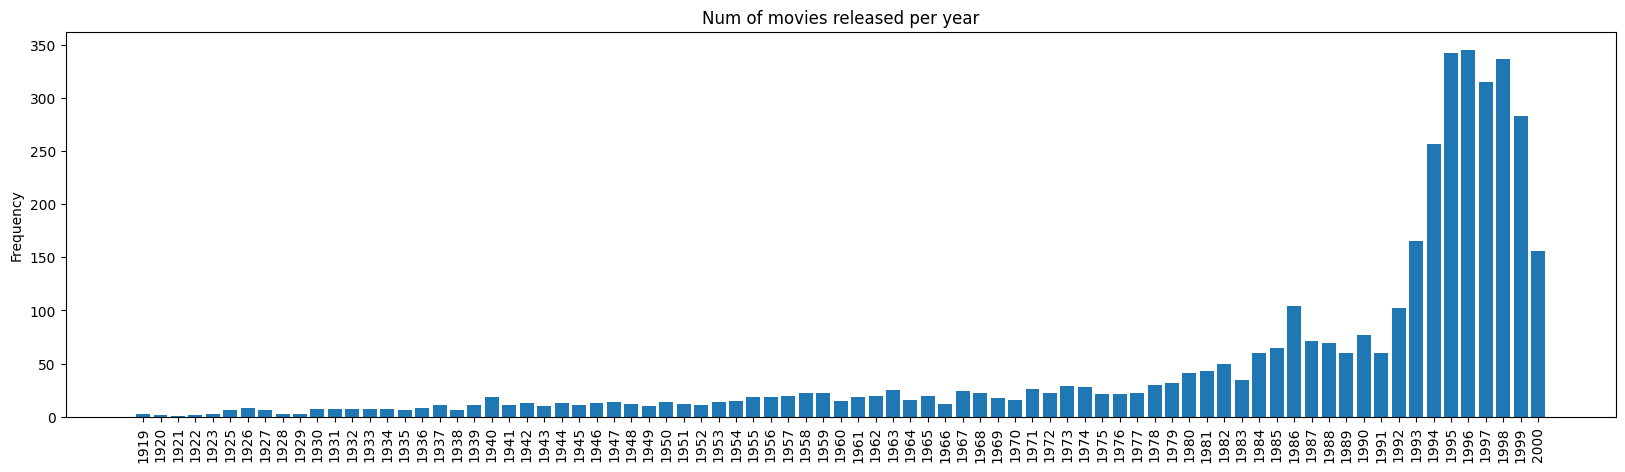

In [ ]:
from collections import Counter
import re

query = """SELECT title FROM movielens.data_movies ;"""
rows=session.execute(query)
count=0
rel_years = []

for row in rows:
    # print(row)
    year_pattern = r'\((\d{4})\)'
    # Use re.search to find the match
    match = re.search(year_pattern, str(row))

    # Extract the year if there is a match
    if match:
        extracted_year = match.group(1)
        rel_years.append(extracted_year)
    else:
        print("No year found in the string.")

# Use Counter to count the frequency of each element
frequency_years = Counter(sorted(rel_years))

# Extract elements and frequencies for plotting
elements = list(frequency_years.keys())
frequencies = list(frequency_years.values())

# Create a bar plot
plt.figure(figsize=(20, 5))
plt.bar(elements, frequencies)
# plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Num of movies released per year')
plt.xticks(rotation=90)
plt.show()

* Depict the plot of Age groups ratio who are active in watching movies

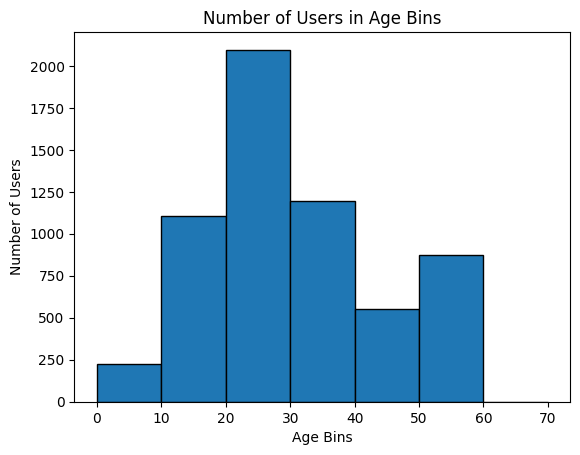

In [ ]:
from collections import Counter
import re

query = """SELECT age FROM movielens.data_users ;"""
rows=session.execute(query)

count=0
age_list = []

for row in rows:
    age_list.append(row.age)

# Define the age bins
bins = [0, 10, 20, 30, 40, 50, 60,70]

# Create a histogram
plt.hist(age_list, bins=bins, edgecolor='black')
# Customize the plot
plt.xlabel('Age Bins')
plt.ylabel('Number of Users')
plt.title('Number of Users in Age Bins')
plt.show()



### Analyzing the Data

Analyzing the correlation between the movies records, implement a function to recommend movies based on search term

* Retrieve all the data from ratings table

In [ ]:
query = """SELECT * FROM movielens.data_ratings ;"""
rows=session.execute(query)

count=0
for row in rows:
    print(row)
    count+=1
    if count > 4:
        break

# Convert ResultSet to Pandas DataFrame
df_ratings = pd.DataFrame(rows)

Row(movieid=3372, userid=299, rating=4)
Row(movieid=3372, userid=344, rating=5)
Row(movieid=3372, userid=348, rating=3)
Row(movieid=3372, userid=435, rating=4)
Row(movieid=3372, userid=637, rating=4)


* Create a movie matrix by applying pivot table with the above retrieved ratings data

* use `pd.pivot_table` with index = `userid`, columns = `movieid` and Values = `rating`

 **Hint:** create a dataframe with above retrieved ratings data to apply pivot table

In [ ]:
# Use pivot_table to create a pivot table
movie_mat_df = pd.pivot_table(df_ratings, values='rating', index='userid', columns='movieid')
movie_mat_df

movieid,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Define a function named `recommend_movies()` which will take a movieid as argument and return the top 5 similar movieid's

    * Considering the argument (movieid) as search item collect the particular row data
    
    * Using movie matrix calculate correlation between movie search Item data and all the remaining data
    
        * Hint: [corr_with()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html)
        
    * Sort the result by ascending order and return the top 5 items

In [ ]:
import warnings

def recommend_movie(movieId):

    col = movie_mat_df.iloc[:,movieId]

    # Suppress RuntimeWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)

        corrMat = movie_mat_df.corrwith(col, axis=0)
        top_5_movies = corrMat.sort_values(ascending=False).index[0:5]

    return top_5_movies

recommend_movie(1584)

Int64Index([3934, 2632, 578, 3592, 3657], dtype='int64', name='movieid')

* write a query to get MovieId of a Title (your choice) and the result MovieId as a search item by calling the above defined function

In [ ]:
movieid_for_recco = 110

prepared_stmt = session.prepare("SELECT title,genres FROM movielens.data_movies where movieid = ?")
rows = session.execute(prepared_stmt, [movieid_for_recco])
print("Movie on which recommendations are based:")
for row in rows:
    print(row)

Movie on which recommendations are based:
Row(title='Braveheart (1995)', genres='Action|Drama|War')


* Now taking the result of top 5 items (MovieId's) write a query to retrieve the Movie title from movies table

In [ ]:
print("Recommendations:")
top_5_recco = recommend_movie(movieid_for_recco)
variable_value = list(top_5_recco)

prepared_stmt = session.prepare("SELECT title, genres FROM movielens.data_movies where movieid in ?")
rows = session.execute(prepared_stmt, [variable_value])

for row in rows:
    print(row)

Recommendations:
Row(title='Cold Comfort Farm (1995)', genres='Comedy')
Row(title='Artemisia (1997)', genres='Drama')
Row(title='Indiana Jones and the Temple of Doom (1984)', genres='Action|Adventure')
Row(title='Lifeforce (1985)', genres='Horror|Sci-Fi')
Row(title='First Blood (1982)', genres='Action')
